### Network Summary

In [111]:
# To get account token u have to create standalone mini app in VK
# account tokens and make oauth request
# Instructions on how to do this taken from this page
# https://habr.com/ru/post/221251/
# https://oauth.vk.com/authorize?client_id=IDприложения&scope=friends,offline&redirect_uri=https://oauth.vk.com/blank.html&display=page&v=5.21&response_type=token

In [112]:
import numpy as np
import pandas as pd
import networkx as nx

import requests
import time
import collections

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

access_token = "fdea5c47bfca81d2b27d8a8a1c4a2e92bd1539859f2c8f468a5950a1566c2787703f06cced0250066803d"
my_user_id = 321314306

In [113]:
# Source code for next cell and instructions on how to work with API taken from here 
# https://habr.com/ru/post/263313/

In [114]:

def get_friends_ids(user_id,acc_tok):
    friends_url = 'https://api.vk.com/method/friends.get?user_id={}&access_token={}&v=5.130' 
    json_response = requests.get(friends_url.format(user_id,acc_tok)).json()
    if json_response.get('error'):
        print (json_response.get('error'))
        return list()
    return json_response['response']["items"]
graph = {}
friend_ids = get_friends_ids(my_user_id,access_token) 
for friend_id in friend_ids:
    print ('Processing id: ', friend_id)
    graph[friend_id] = get_friends_ids(friend_id,access_token)

Processing id:  4335674
Processing id:  13275626
Processing id:  14604726
Processing id:  22819153
Processing id:  24501383
Processing id:  29541095
Processing id:  30693303
Processing id:  43046350
Processing id:  43320962
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '43320962'}, {'key': 'v', 'value': '5.130'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
Processing id:  43441883
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '43441883'}, {'key': 'v', 'value': '5.130'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
Processing id:  45800447
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '45800447'}, {'key': 'v', 'value': '5.130'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
Processing id:  50320708
{'error_

In [338]:
g = nx.Graph(directed=False)
for i in graph:
    g.add_node(i)
    for j in graph[i]:
        if i != j and i in friend_ids and j in friend_ids:
            g.add_edge(i, j)

In [337]:
# Function based on get_friends_id
def get_user_params(user_id,acc_tok):
    friends_url = 'https://api.vk.com/method/users.get?user_id={}&fields=sex,education,city&access_token={}&v=5.130' 
    json_response = requests.get(friends_url.format(user_id,acc_tok)).json()
    if json_response.get('error'):
        print (json_response.get('error'))
        return list()
    return json_response['response']
params={}
for friend_id in friend_ids:
    params[friend_id]=get_user_params(friend_id,access_token)

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '43441883'}, {'key': 'fields', 'value': 'sex,education,city'}, {'key': 'v', 'value': '5.130'}, {'key': 'method', 'value': 'users.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '45800447'}, {'key': 'fields', 'value': 'sex,education,city'}, {'key': 'v', 'value': '5.130'}, {'key': 'method', 'value': 'users.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '50320708'}, {'key': 'fields', 'value': 'sex,education,city'}, {'key': 'v', 'value': '5.130'}, {'key': 'method', 'value': 'users.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '50542921'}, {'key': 'fields', 'value': 'sex,educatio

In [333]:
params

{4335674: [{'first_name': 'Андрей',
   'id': 4335674,
   'last_name': 'Зизин',
   'can_access_closed': True,
   'is_closed': False,
   'sex': 2,
   'city': {'id': 124, 'title': 'Саранск'},
   'university': 792,
   'university_name': 'МГУ им. Н. П. Огарева',
   'faculty': 122578,
   'faculty_name': 'Экономический факультет',
   'graduation': 2010,
   'education_form': 'Очное отделение'}],
 13275626: [{'first_name': 'Даша',
   'id': 13275626,
   'last_name': 'Киселёва',
   'can_access_closed': True,
   'is_closed': False,
   'sex': 1,
   'city': {'id': 198, 'title': 'Wien'},
   'university': 527522,
   'university_name': 'Fachhochschule Technikum Wien',
   'faculty': 935890,
   'faculty_name': 'Wirtschaftsinformatik',
   'graduation': 2021,
   'education_status': 'Студентка (магистр)'}],
 14604726: [{'first_name': 'Станислав',
   'id': 14604726,
   'last_name': 'Ямашкин',
   'can_access_closed': True,
   'is_closed': False,
   'sex': 2,
   'city': {'id': 124, 'title': 'Саранск'},
   'uni

In [340]:
param_names=["first_name","last_name","sex","city","university_name"]

In [342]:
used_params={}
for i in friend_ids:
    try: 
        isinstance(params[i][0],dict)
    except IndexError:
        continue
    used_params[i]={}
    for k in param_names:
        try:
            used_params[i][k]=params[i][0][k]
        except KeyError:
            used_params[i][k]="None"

In [343]:
print("Number of friends with open or/and complete proifle parameters:",len(used_params))

Number of friends with open or/and complete proifle parameters: 27


In [344]:
# Transform sex labels
for i in used_params:
    if used_params[i]["sex"]==2:
        used_params[i]["sex"]="Male"
    elif used_params[i]["sex"]==1:
        used_params[i]["sex"]="Female"

In [345]:
# Transform city labels
for i in used_params:
    try :
        used_params[i]["city"]=used_params[i]["city"]["title"]
    except TypeError:
        continue

In [346]:
nx.set_node_attributes(g,used_params)

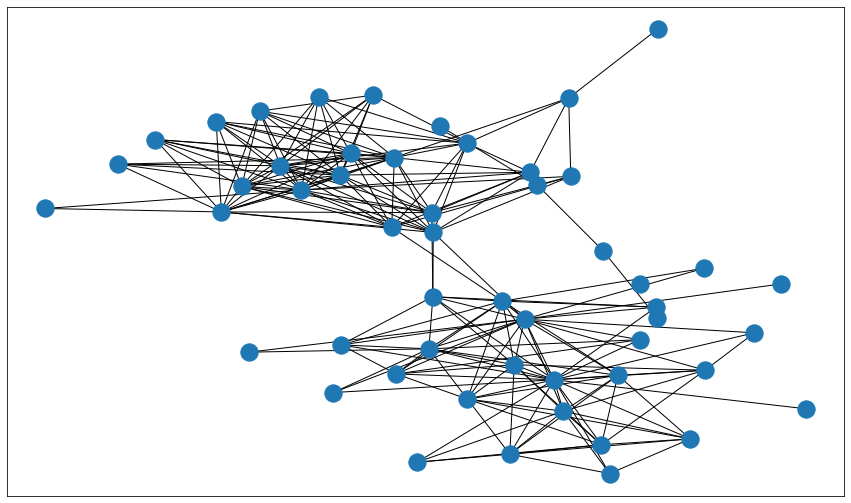

In [347]:
plt.figure(figsize=(15,9))
layout = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos=layout,with_labels=False)

In [348]:
def select_gygantic_component(g: nx.Graph) -> nx.Graph:
    n=max(nx.connected_components(g),key=len)
    s=g.subgraph(n).copy()
    return s

In [349]:
print("Initial Order:",len(g.nodes))
print("Initial Size:",len(g.edges))
print("Number of connected components:",nx.number_connected_components(g))
gg=select_gygantic_component(g)
print("Order:",len(gg.nodes))
print("Size:",len(gg.edges))
print("Number of connected components:",nx.number_connected_components(gg))
print("Average path length:",nx.average_shortest_path_length(gg))
print("Average clustering coefficient:",nx.average_clustering(gg))
print("Radius:",nx.radius(gg))
print("Diameter:",nx.diameter(gg))

Initial Order: 52
Initial Size: 207
Number of connected components: 3
Order: 47
Size: 204
Number of connected components: 1
Average path length: 2.602220166512488
Average clustering coefficient: 0.6565791040232777
Radius: 3
Diameter: 6


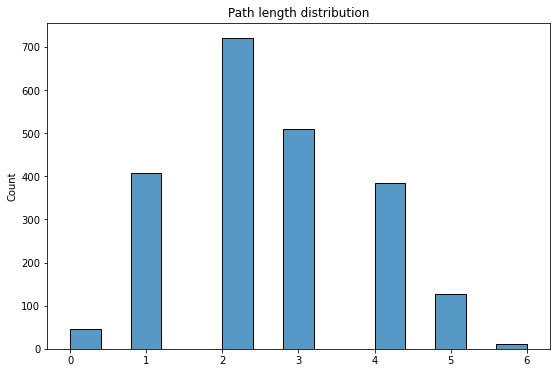

In [351]:
plt.figure(figsize=(9,6))
sns.histplot(pathlengths,bins=15)
plt.title("Path length distribution")
plt.show()

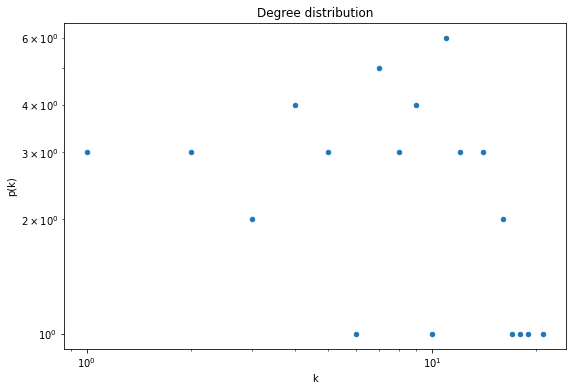

In [376]:
degree_hist = np.array(nx.degree_histogram(gg))
idx = np.argwhere(degree_hist > 0)
plt.figure(figsize=(9,6))
plt.scatter(idx, degree_hist[idx], s=20)
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title("Degree distribution")
plt.xscale('log')
plt.yscale('log')

In [353]:
print("Average degree:",np.mean(dh))

Average degree: 8.680851063829786


Average_local_clustering: 0.6565791040232776


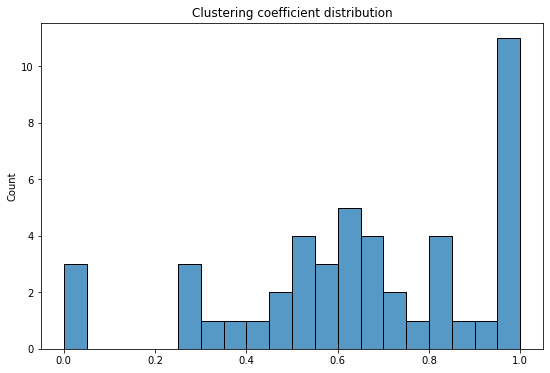

In [354]:
cc=[]
for i in gg.nodes:
    cc.append(nx.clustering(gg,i))
print("Average_local_clustering:",np.mean(cc))
plt.figure(figsize=(9,6))
sns.histplot(cc,bins=20)
plt.title("Clustering coefficient distribution")
plt.show()

In [200]:
nx.write_gexf(gg, "test.gexf")

### Structural Analysis

In [379]:
er_g = nx.erdos_renyi_graph(52,0.5934464978671933)
ba_g = nx.barabasi_albert_graph(52,5)
ws_g = nx.watts_strogatz_graph(52,5,0.5934464978671933)

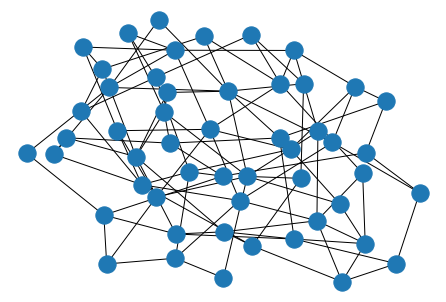

In [380]:
nx.draw(ws_g)

In [382]:
print("Average clustering")
print("Original",np.round(nx.average_clustering(gg),4))
print("Erdos:",np.round(nx.average_clustering(er_g),4))
print("Barabasi",np.round(nx.average_clustering(ba_g),4))
print("Watts:",np.round(nx.average_clustering(ws_g),4))

Average clustering
Original 0.6566
Erdos: 0.5932
Barabasi 0.3214
Watts: 0.0686


In [383]:
print("Average shortest path length")
print("Original",np.round(nx.average_shortest_path_length(gg),4))
print("Erdos:",np.round(nx.average_shortest_path_length(er_g),4))
print("Barabasi",np.round(nx.average_shortest_path_length(ba_g),4))
print("Watts:",np.round(nx.average_shortest_path_length(ws_g),4))

Average shortest path length
Original 2.6022
Erdos: 1.4057
Barabasi 1.9585
Watts: 2.8974


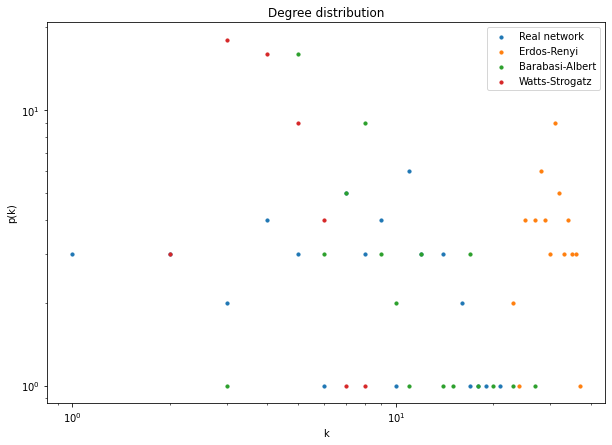

In [388]:
degree_hist = np.array(nx.degree_histogram(gg))
idx = np.argwhere(degree_hist > 0)
plt.figure(figsize=(10,7))
plt.scatter(idx, degree_hist[idx], s=10, label='Real network')
degree_hist = np.array(nx.degree_histogram(er_g))
idx = np.argwhere(degree_hist > 0)
plt.scatter(idx, degree_hist[idx], s=10, label='Erdos-Renyi')
degree_hist = np.array(nx.degree_histogram(ba_g))
idx = np.argwhere(degree_hist > 0)
plt.scatter(idx, degree_hist[idx], s=10, label='Barabasi-Albert')
degree_hist = np.array(nx.degree_histogram(ws_g))
idx = np.argwhere(degree_hist > 0)
plt.scatter(idx, degree_hist[idx], s=10, label='Watts-Strogatz')
plt.legend()
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title("Degree distribution")
plt.xscale('log')
plt.yscale('log')
plt.show()

In [390]:
dc = nx.degree_centrality(gg)
bc = nx.betweenness_centrality(gg)
clc = nx.closeness_centrality(gg)
topd=sorted(dc.items(), key=lambda i: i[1], reverse=True)[:10]
topc=sorted(clc.items(), key=lambda i: i[1], reverse=True)[:10]
topb=sorted(bc.items(), key=lambda i: i[1], reverse=True)[:10]
fid=[]
centrality=[]
for i in topd:
    fid.append(i[0])
    centrality.append(i[1])
degreef=pd.DataFrame({"id":fid,"centrality":centrality})
fid=[]
centrality=[]
for i in topb:
    fid.append(i[0])
    centrality.append(i[1])
degreeb=pd.DataFrame({"id":fid,"centrality":centrality})
fid=[]
centrality=[]
for i in topc:
    fid.append(i[0])
    centrality.append(i[1])
degreec=pd.DataFrame({"id":fid,"centrality":centrality})

          id  centrality
0  107936423    0.456522
1  112949977    0.413043
2  182702156    0.391304
3   43046350    0.369565
4  157721225    0.347826
5   29541095    0.347826
6  149472029    0.304348
7  172544725    0.304348
8   66761901    0.304348
9  121383187    0.260870


In [391]:
degreef

,id,centrality
0,107936423,0.456522
1,112949977,0.413043
2,182702156,0.391304
3,43046350,0.369565
4,157721225,0.347826
5,29541095,0.347826
6,149472029,0.304348
7,172544725,0.304348
8,66761901,0.304348
9,121383187,0.260870


In [392]:
degreeb

,id,centrality
0,112949977,0.322938
1,121383187,0.303545
2,107936423,0.171206
3,201041908,0.122762
4,68373415,0.113630
5,114314651,0.110081
6,182702156,0.061492
7,43046350,0.055632
8,135515945,0.054661
9,43320962,0.044106


In [393]:
degreec

,id,centrality
0,112949977,0.554217
1,121383187,0.528736
2,201041908,0.511111
3,68373415,0.494624
4,114314651,0.484211
5,135515945,0.464646
6,107936423,0.460000
7,43046350,0.446602
8,182702156,0.446602
9,157721225,0.438095


In [401]:
# This degree was first in two of competitions
degreec["id"][0]

112949977

In [404]:
gg.nodes[112949977]

{'first_name': 'Егор',
 'last_name': 'Кошелев',
 'sex': 'Male',
 'city': 'None',
 'university_name': ''}